In [1]:
from sklearn.datasets import load_iris

In [2]:
# explore data, plot features

iris = load_iris()

print(iris.feature_names)
print(iris.data) # get feature values

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

<IPython.core.display.Javascript object>


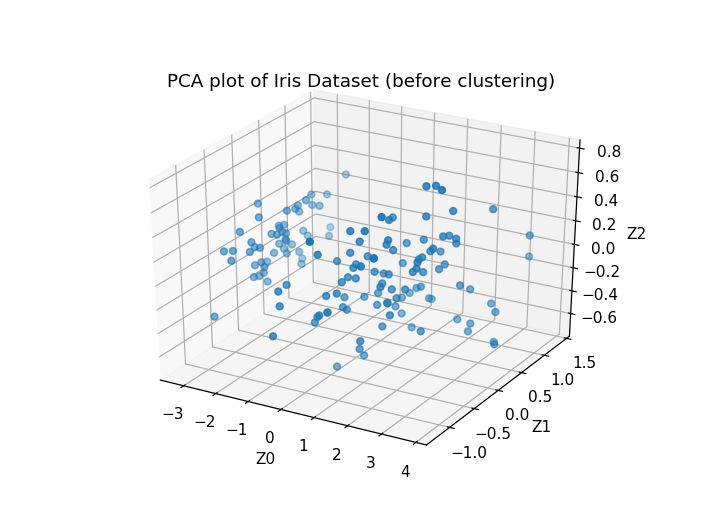

In [7]:
# plot the data in 3D
%matplotlib notebook
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pca = PCA(n_components=3) # reduce to 3 dimensions to plot

X = iris.data
pca.fit(X)
Z = pca.transform(X)

# plot Z in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2])
ax.set_title("PCA plot of Iris Dataset (before clustering)")
ax.set(xlabel='Z0', ylabel='Z1', zlabel='Z2')
plt.show()

In [17]:
# KMeans
from sklearn.cluster import KMeans

# n_init=5 means run KMeans 5 times with different centroid seeds
#
# for n in n_init:
#   run_kmeans (randomly select random seed)
#
# find best n_init
#
# (more stable result)
kmeans = KMeans(n_clusters=3, n_init=5)
clusters = kmeans.fit_predict(X) # cluster on all 4 features (X)

print('centroids', kmeans.cluster_centers_)

centroids [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [18]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [19]:
import pandas as pd
from sklearn.metrics import v_measure_score

df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters),
                pd.DataFrame(iris.target)],
               axis=1)

v_measure_score(iris.target, clusters)

0.7581756800057784

<IPython.core.display.Javascript object>


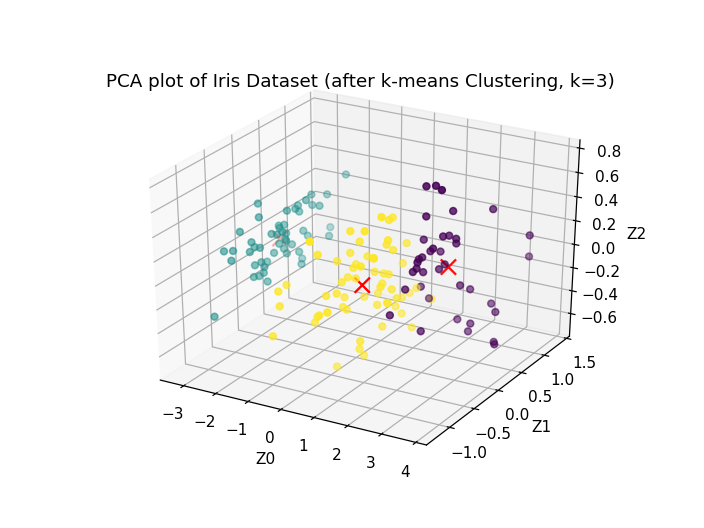

In [16]:
# transform centroids from 4d to 3d
Z_centroids = pca.transform(kmeans.cluster_centers_)

# plot Z and centroids in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# colour the points based on cluster value
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
# traditional way:
# for i in range(3):
#    ax.scatter(Z[clusters==i, 0], Z[clusters==i, 1], Z[clusters==i, 2])
#
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2],
           marker='x', s=100, color='red') # use size 100 marker

ax.set_title("PCA plot of Iris Dataset (after k-means Clustering, k=3)")
ax.set(xlabel='Z0', ylabel='Z1', zlabel='Z2')

plt.show()

In [25]:
# K-means: how it works

# 1. pick k (k=3)
# 2. randomly initialise k centroids from samples (pick k samples)
#
# Repeat N times:
# 3. for each sample
#       for each centroid
#           compute distance between (centroid - sample)
#       assign closest centroid's cluster to sample
# 4. update centroids by finding mean of member samples
#
import numpy as np
np.random.seed(0)

def vanilla_kmeans(X, n_clusters, max_iters=5):
    # randomly initialize centroids
    centroid_idxes = np.random.choice(np.arange(len(X)), n_clusters)
    print('seeding centroids at indices', centroid_idxes)

    centroids = X[centroid_idxes, :]
    print('initial centroids', centroids)
    
    for i in range(max_iters):
        # assign clusters based on centroids
        C = []
        for x in X:
            distances = []
            for c in centroids:
                # sum of squared distances
                distances.append(np.dot(x - c, x - c))

            # find the cluster with the smallest distance
            C.append(np.argmin(distances))
    
        C = np.array(C)
        # update centroids
        for k in range(n_clusters):
            centroids[k] = X[C == k, :].mean(axis=0)
                                
    print('centroids after %d iterations' % max_iters, centroids)
    return centroids, C

vanilla_kmeans(X, 3)    

seeding centroids at indices [ 47 117  67]
initial centroids [[4.6 3.2 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [5.8 2.7 4.1 1. ]]
centroids after 5 iterations [[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


(array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64))

<IPython.core.display.Javascript object>


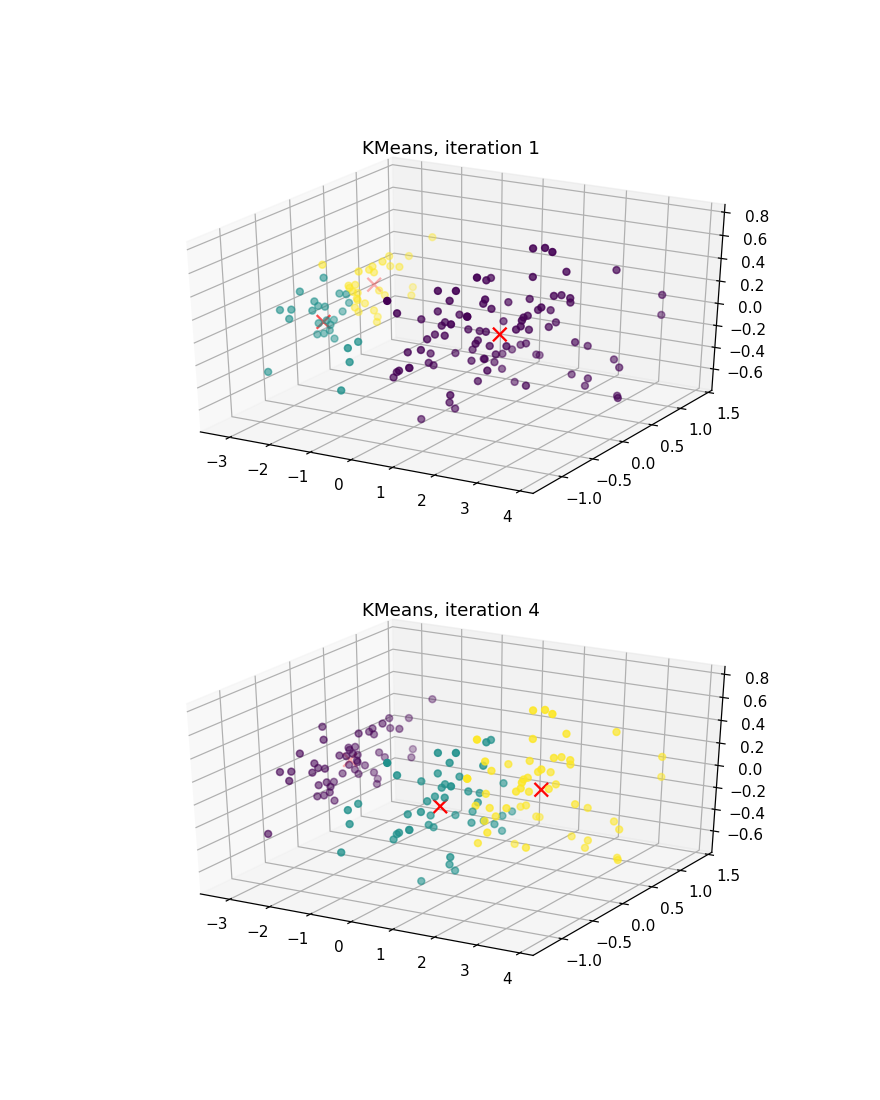

seeding centroids at indices [103   9  21]
initial centroids [[6.3 2.9 5.6 1.8]
 [4.9 3.1 1.5 0.1]
 [5.1 3.7 1.5 0.4]]
centroids after 1 iterations [[6.31458333 2.89583333 4.97395833 1.703125  ]
 [4.76538462 2.98846154 1.71923077 0.32692308]
 [5.22857143 3.675      1.48214286 0.28214286]]
seeding centroids at indices [36 87 70]
initial centroids [[5.5 3.5 1.3 0.2]
 [6.3 2.3 4.4 1.3]
 [5.9 3.2 4.8 1.8]]
centroids after 4 iterations [[5.006      3.428      1.462      0.246     ]
 [5.79361702 2.71914894 4.2212766  1.34255319]
 [6.67735849 3.00754717 5.51320755 1.97169811]]


Text(0.5,0.92,'KMeans, iteration 4')

In [26]:
fig = plt.figure(figsize=(8, 10))

# iteration 1
ax = fig.add_subplot(211, projection='3d')
centroids, clusters = vanilla_kmeans(X, 3, max_iters=1)
Z_centroids = pca.transform(centroids)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2], s=80, marker='x', color='red')
ax.set_title('KMeans, iteration 1')

# iteration 4
ax = fig.add_subplot(212, projection='3d')
centroids, clusters = vanilla_kmeans(X, 3, max_iters=4)
Z_centroids = pca.transform(centroids)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1], Z_centroids[:, 2], s=80, marker='x', color='red')
ax.set_title('KMeans, iteration 4')

In [ ]:
# Elbow plot

# for k in num_clusters:
#    run kmeans(k)
#    compute cost
#
# plot to find elbow (hopefully)

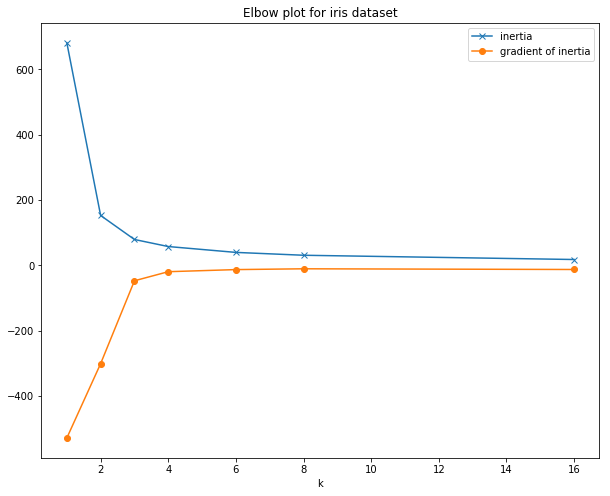

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 39.30610712530712, 30.56895403615992, 17.553324288284816]


In [30]:
%matplotlib inline
ks = [1, 2, 3, 4, 6, 8, 16]
cost = []
difference = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=5)
    kmeans.fit(X)
    cost.append(kmeans.inertia_) # sum of squared distances to centroid

# plot k vs cost
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ks, cost, marker='x', label='inertia')
ax.plot(ks, np.gradient(cost), marker='o', label='gradient of inertia')
ax.set_title('Elbow plot for iris dataset')
ax.set_xlabel('k')
ax.legend()
plt.show()

print(cost)

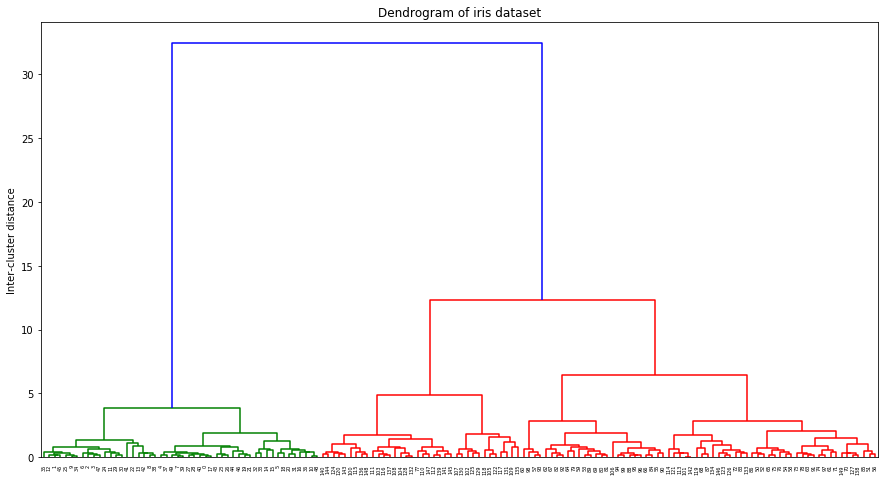

In [34]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# data = [[0., 0.], [0.1, -0.1], [1., 1.], [1.1, 1.1]]
links = linkage(X, 'ward')
fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)
ax.set_title('Dendrogram of iris dataset')
ax.set_ylabel('Inter-cluster distance')
plt.show() 

In [75]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3)
clusters = ag.fit_predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

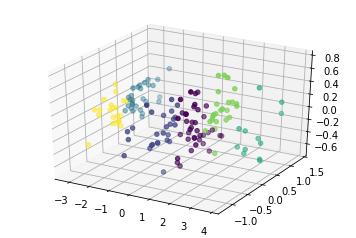

In [61]:
# plot Z and centroids in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# colour the points based on cluster value
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=clusters)

plt.show()

In [83]:
kmeans?

In [100]:
# Evaluation metrics to compare algorithms
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, n_init=5)
cluster_kmeans = kmeans.fit_predict(X)
print('Kmeans', silhouette_score(X, cluster_kmeans))
print(cluster_kmeans)

ag = AgglomerativeClustering(n_clusters=3)
cluster_ag = ag.fit_predict(X)
print('Hierarchical', silhouette_score(X, cluster_ag))
print(cluster_ag)

Kmeans 0.5525919445213676
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Hierarchical 0.5540972907866913
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [104]:
df = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_kmeans),
                pd.DataFrame(iris.target)],
               axis=1)

df.columns = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)', 'cluster', 'target']

# all the samples with target = 0
print('target = 0')
print('cluster', df[df['target'] == 0]['cluster'].value_counts())
print()
print('target = 1')
print('cluster', df[df['target'] == 1]['cluster'].value_counts())
print()
print('target = 2')
print('cluster', df[df['target'] == 2]['cluster'].value_counts())

target = 0
cluster 1    50
Name: cluster, dtype: int64

target = 1
cluster 0    48
2     2
Name: cluster, dtype: int64

target = 2
cluster 2    36
0    14
Name: cluster, dtype: int64


In [112]:
df[df['target'] == 2]['cluster'].value_counts()

2    36
0    14
Name: cluster, dtype: int64

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


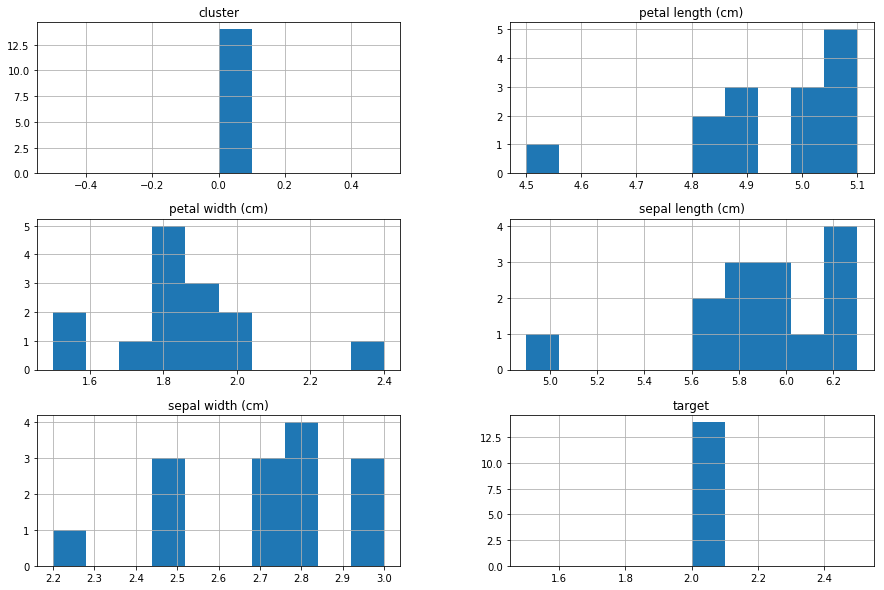

In [119]:
fig, ax = plt.subplots(figsize=(15, 10))

df[(df['target'] == 2) & (df['cluster'] == 0)].hist(ax=ax)
plt.show()

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


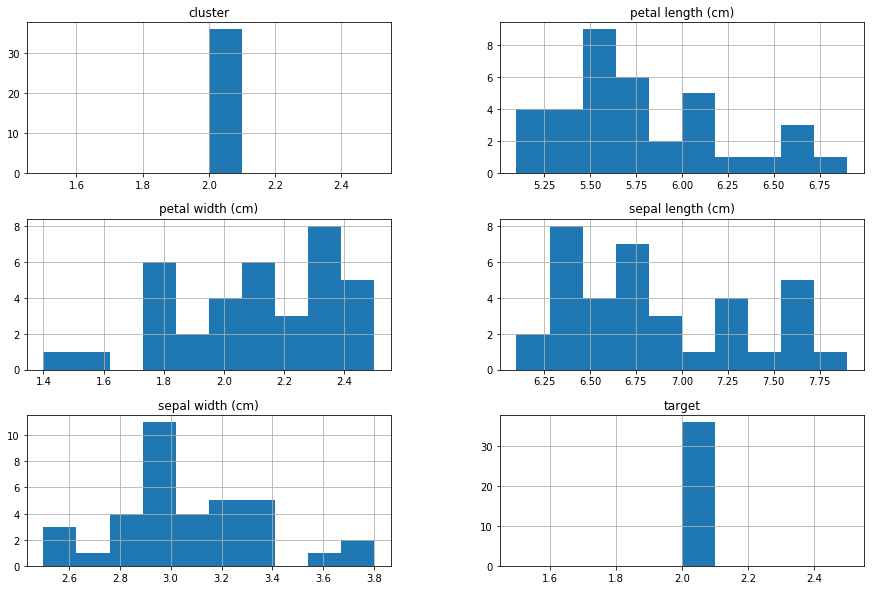

In [121]:
fig, ax = plt.subplots(figsize=(15, 10))

df[(df['target'] == 2) & (df['cluster'] == 2)].hist(ax=ax)
plt.show()

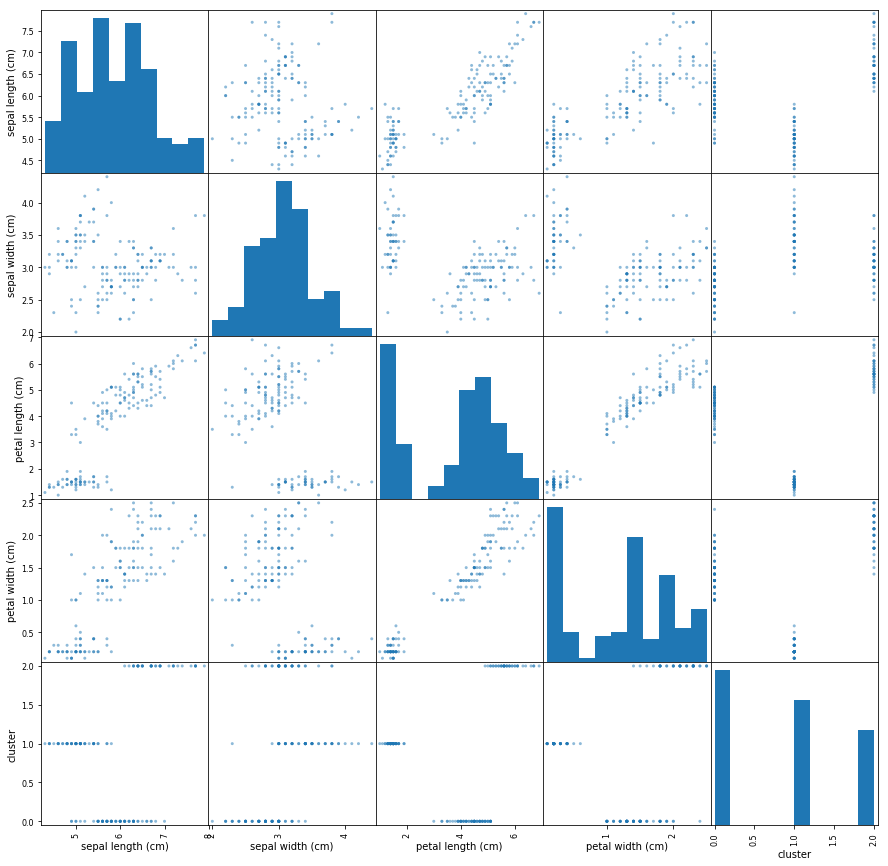

In [129]:
# without ground truth - look at histogram / scatter matrix
# with ground truth - compare misclustered samples
from pandas.plotting import scatter_matrix

df_notarget = df.loc[:, df.columns != 'target']

scatter_matrix(df_notarget, figsize=(15, 15))
plt.show()

In [134]:
# if you want to try MNIST
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X = mnist.data

In [136]:
df_x = pd.DataFrame(X)
df_x = df_x.sample(n=10000, random_state=42)
df_x.values.shape

(10000, 784)

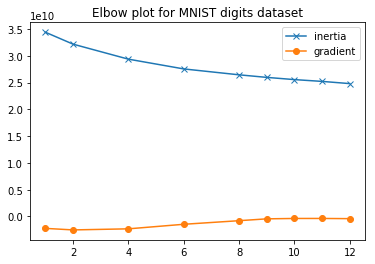

In [137]:
ks = [1, 2, 4, 6, 8, 9, 10, 11, 12]
cost = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=5)
    kmeans.fit(df_x.values)
    cost.append(kmeans.inertia_) # sum of squared distances to centroid

# plot k vs cost
fig, ax = plt.subplots()
ax.plot(ks, cost, marker='x', label='inertia')
ax.plot(ks, np.gradient(cost), marker='o', label='gradient')
ax.set_title('Elbow plot for MNIST digits dataset')
ax.legend()
plt.show()

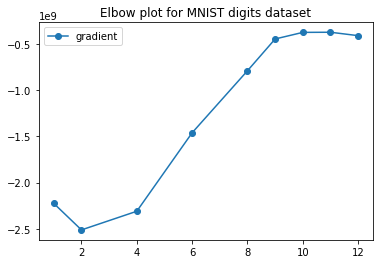

In [138]:
# plot k vs cost
fig, ax = plt.subplots()
ax.plot(ks, np.gradient(cost), marker='o', label='gradient')
ax.set_title('Elbow plot for MNIST digits dataset')
ax.legend()
plt.show()

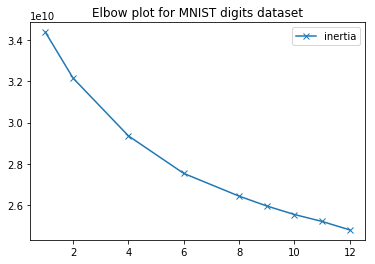

In [139]:
# plot k vs cost
fig, ax = plt.subplots()
ax.plot(ks, cost, marker='x', label='inertia')
ax.set_title('Elbow plot for MNIST digits dataset')
ax.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=5)
clusters = kmeans.fit_predict(df_x.values)

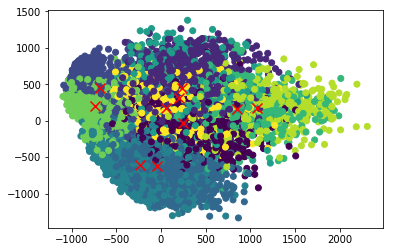

In [144]:
pca = PCA(n_components=2)
pca.fit(df_x.values)

Z = pca.transform(df_x.values)
Z_centroids = pca.transform(kmeans.cluster_centers_)

# plot Z and centroids in scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)

# colour the points based on cluster value
ax.scatter(Z[:, 0], Z[:, 1], c=clusters)
ax.scatter(Z_centroids[:, 0], Z_centroids[:, 1],
           marker='x', s=100, color='red') # use size 100 marker

plt.show()

In [145]:
print(silhouette_score(df_x.values, clusters))

0.05955111585386517
